In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing Test and Train data files.
df_Test = pd.read_csv(r'C:\Users\mkp02\Downloads\Test.csv')
df_Train = pd.read_csv(r'C:\Users\mkp02\Downloads\Train.csv')
df_Train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df_Train.shape, df_Test.shape

((8523, 12), (5681, 11))

In [4]:
df_Train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df_Train.isnull().sum()/df_Train.shape[0]*100  

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [6]:
df_Test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
df_Test.isnull().sum()/df_Train.shape[0]*100   

Item_Identifier               0.000000
Item_Weight                  11.451367
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  18.843130
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [8]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df_Train['Item_Weight'] =  df_Train['Item_Weight'].fillna(df_Train['Item_Weight'].mean())
df_Test['Item_Weight'] =  df_Test['Item_Weight'].fillna(df_Test['Item_Weight'].mean())

In [10]:
df_Train['Outlet_Size'] =  df_Train['Outlet_Size'].fillna(df_Train['Outlet_Size'].mode()[0])
df_Test['Outlet_Size'] =  df_Test['Outlet_Size'].fillna(df_Test['Outlet_Size'].mode()[0])

In [11]:
df_Train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
df_Test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Data Analysis

<AxesSubplot:xlabel='Item_Weight'>

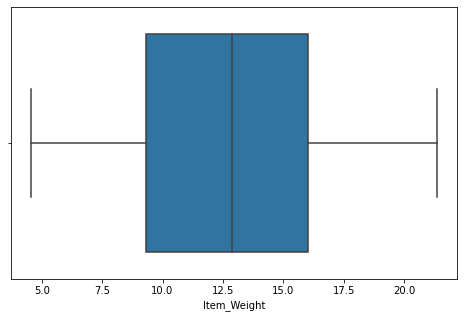

In [13]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(x=df_Train['Item_Weight'])

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

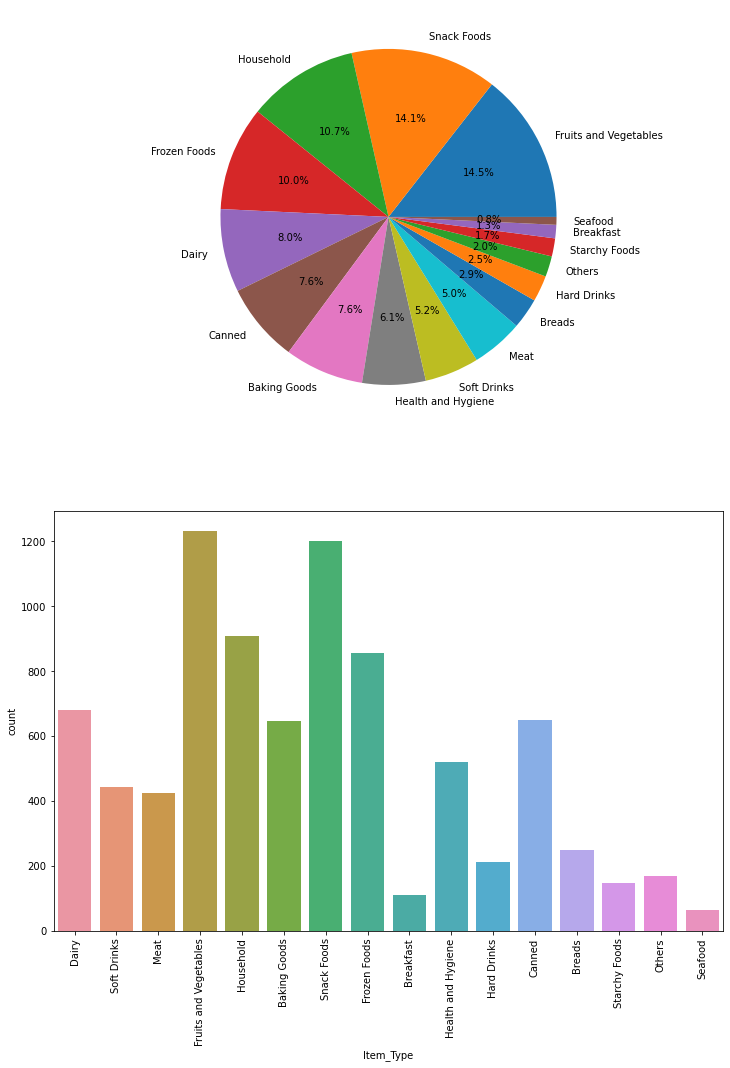

In [14]:
#food types and items count

plt.figure(figsize=(12,17))
plt.subplot(2,1,1)
df_Train['Item_Type'].value_counts().plot.pie(autopct='%1.1f%%',textprops={'fontsize':10})
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(df_Train['Item_Type'])
plt.xticks(rotation=90)
df_Train['Item_Type'].value_counts()

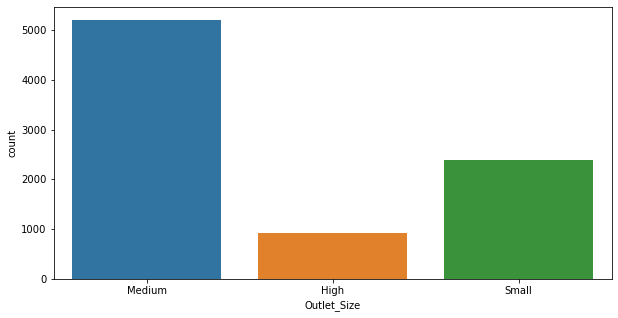

In [15]:
#Outlets and their size

plt.figure(figsize=(10,5))
sns.countplot(df_Train.Outlet_Size);

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

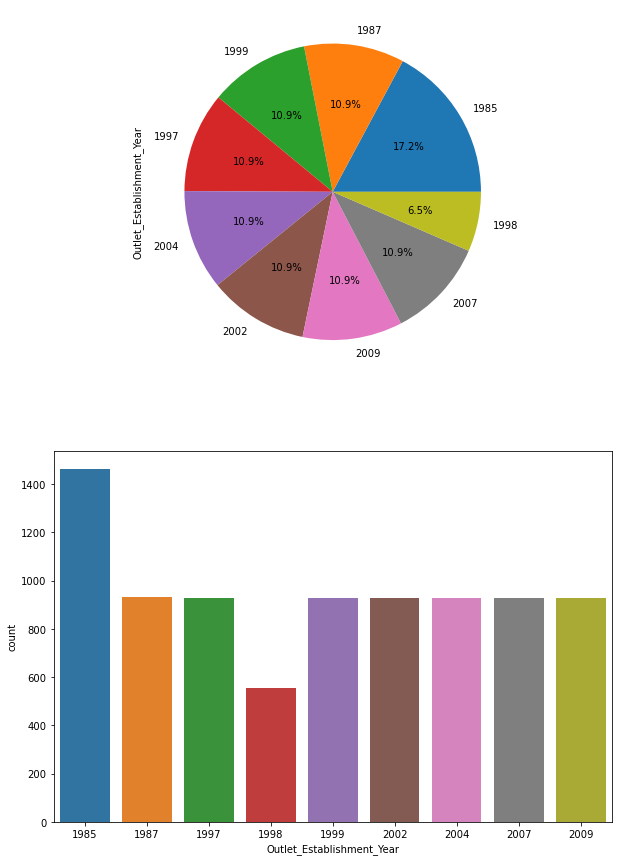

In [16]:
#how much outlets are opened and which year

plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
df_Train['Outlet_Establishment_Year'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(2,1,2)
sns.countplot(df_Train['Outlet_Establishment_Year'])
df_Train['Outlet_Establishment_Year'].value_counts()

# Feature Engineering

In [17]:
df_Train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
df_Train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
df_Test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [19]:
df_Train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857645,4.226124,4.555,9.310000,12.857645,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [20]:
df_Train = df_Train.drop(['Item_Identifier','Outlet_Identifier'], axis = 1)
df_Test = df_Test.drop(['Item_Identifier','Outlet_Identifier'], axis = 1)

In [21]:
import klib

GridSpec(6, 5)

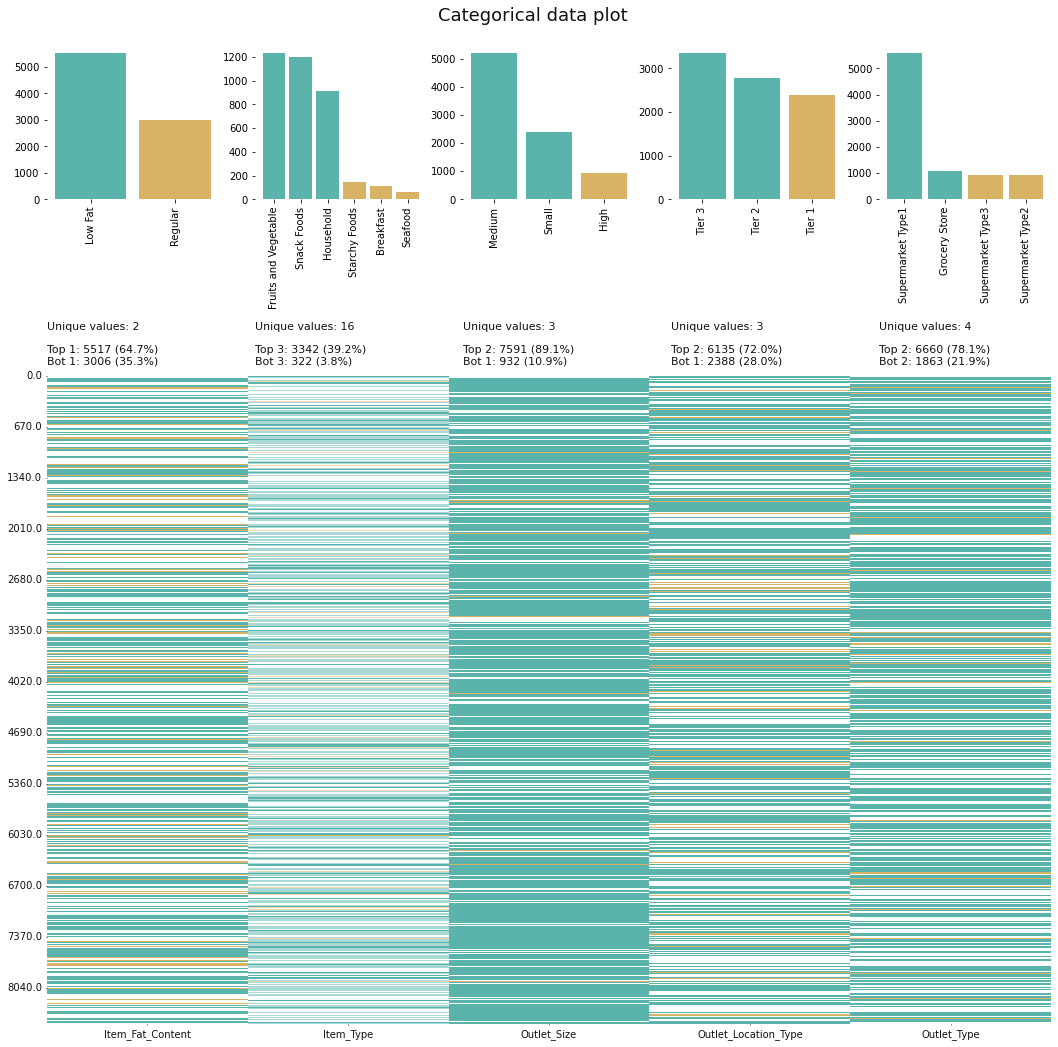

In [22]:
klib.cat_plot(df_Train) 

In [23]:
klib.missingval_plot(df_Train)

No missing values found in the dataset.


In [24]:
klib.data_cleaning(df_Train)

Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [25]:
klib.clean_column_names(df_Train)

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [26]:
 # converts existing to more efficient dtypes, also called inside data_cleaning()

df_Train=klib.convert_datatypes(df_Train)
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                8523 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   float32 
dtypes: category(5), float32(4), int16(1)
memory usage: 192.8 KB


In [27]:
klib.mv_col_handling(df_Train)

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


# Converting Categorial data into Numerical

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_Train['item_fat_content']= le.fit_transform(df_Train['item_fat_content'])
df_Train['item_type']= le.fit_transform(df_Train['item_type'])
df_Train['outlet_size']= le.fit_transform(df_Train['outlet_size'])
df_Train['outlet_location_type']= le.fit_transform(df_Train['outlet_location_type'])
df_Train['outlet_type']= le.fit_transform(df_Train['outlet_type'])

In [29]:
df_Train.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,0,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.920000,1,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.500000,0,0.016760,10,141.617996,1999,1,0,1,2097.270020
3,19.200001,1,0.000000,6,182.095001,1998,1,2,0,732.380005
4,8.930000,0,0.000000,9,53.861401,1987,0,2,1,994.705200


In [30]:
#Spliting data by train_test_split

x=df_Train.drop('item_outlet_sales',axis=1)
y=df_Train['item_outlet_sales']

In [31]:
#Scaling Data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=75)

In [32]:
pd.DataFrame(y_train).value_counts()

item_outlet_sales
958.752014           14
703.084778           13
1845.597656          13
1342.252808          12
1278.336060          12
                     ..
2227.101074           1
2224.437744           1
2210.456055           1
33.955799             1
13086.964844          1
Length: 3170, dtype: int64

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [34]:
X_train= sc.fit_transform(x_train)
X_test= sc.transform(x_test)

In [35]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



# Model Training and Testing

In [36]:
#Model training and testing

from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRFRegressor

In [37]:
knn = KNeighborsRegressor()

dt = DecisionTreeRegressor()

rf = RandomForestRegressor()

gbr = GradientBoostingRegressor()

In [38]:
#Testing with KNN

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r1 = r2_score(y_test,y_pred)
print("R2_Score:",r1)
MAE=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",MAE)
MSE=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",MSE)

R2_Score: 0.5618247295190049
Mean Absolute Error: 798.17303
Mean Squared Error: 1278911.8


In [39]:
#Testing with Decision Tree

dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2 = r2_score(y_test,y_pred)
print("R2_Score:",r2)
MAE=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",MAE)
MSE=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",MSE)

R2_Score: 0.526668418593292
Mean Absolute Error: 835.0936332310519
Mean Squared Error: 1381523.2602459455


In [40]:
#Testing with Random Forest

rf = RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=20,n_jobs=4)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r3 = r2_score(y_test,y_pred)
print("R2_Score:",r3)
MAE=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",MAE)
MSE=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",MSE)

R2_Score: 0.6133986910002095
Mean Absolute Error: 745.5716280558455
Mean Squared Error: 1128381.713380369


In [41]:
#Testing with GradientBoosting

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =0.223)
gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r4 = r2_score(y_test,y_pred)
print("R2_Score:",r4)
MAE=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",MAE)
MSE=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",MSE)

R2_Score: 0.6169324620948219
Mean Absolute Error: 745.1735898593796
Mean Squared Error: 1118067.618239954


# Model Result

In [42]:
#Model Results

metric_results= {'Model': ['KNeighbors', 'Decision Tree','RandomForest','GradientBoosting'], 
                 'R Square': [r1, r2, r3,r4]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R Square
0,KNeighbors,0.561825
1,Decision Tree,0.526668
2,RandomForest,0.613399
3,GradientBoosting,0.616932


In [43]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = GradientBoostingRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=75)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(x_train, y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.581 using {'n_estimators': 100}
0.491 (0.002) with: {'n_estimators': 10}
0.581 (0.006) with: {'n_estimators': 100}
0.516 (0.000) with: {'n_estimators': 1000}


In [44]:
grid_search_forest.best_params_

{'n_estimators': 100}

In [45]:
grid_search_forest.best_score_

0.5813218374693252

In [46]:
y_pred_rf_grid=grid_search_forest.predict(x_test)

In [47]:
r5=r2_score(y_test,y_pred_rf_grid)
r5

0.6184221623815531

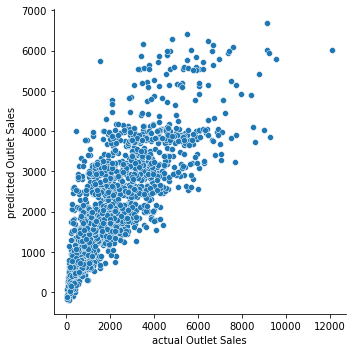

In [48]:
prediction= pd.DataFrame({'actual Outlet Sales': y_test, 'predicted Outlet Sales': y_pred})
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales')